<a href="https://colab.research.google.com/github/SalazarF92/Airbnb_analysis/blob/main/Airbnb_Capetown_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0** - Análise de Flavio Salazar - Aspirante a Ciência de Dados
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *CAPE TOWN*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Cape Town, e ver quais insights podem ser extraídos a partir de dados brutos. Lembrando que é uma cidade pertencente à Africa do Sul, e seu turismo vem crescendo consideravelmente desde a Copa do Mundo, na qual foi sediada no país em 2010.**

## Obtenção dos Dados
  

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import math


**Após obter as informações diretamente do http://insideairbnb.com/get-the-data/, foi realizado o upload ao dropbox, e através de link compartilhado, a captação dos dados como leitura csv utilizando a biblioteca do pandas.**

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df_cptown = pd.read_csv("https://www.dropbox.com/s/2pdjh6d9xs1i5dv/listings.csv?dl=1")

## Análise dos Dados


**Dicionário das variáveis**

Utilizando como referência o link de descrição das variáveis dos dados exibidos - https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1938308660 - temos como principais variáveis a serem analisadas:

* `id` - Identificador único do Airbnb representando o imóvel
* `name` - Nome postado pelo anfitrião (Sem descrição no documento)
* `host_id` - Identificador único do anfitrião (Sem descrição no documento)
* `host_name` - Nome do anfitrião (Sem descrição no documento)
* `neighbourhood_group` - Sem nenhum valor disponibilizado neste documento, porém pela documentação indica como um código de geolocalização utilizando a latitude e longitude em relação aos bairros.
* `latitude` - Utiliza o sistema WGS84 para projeção de latitude e longitude
* `longitude` - Utiliza o sistema WGS84 para projeção de latitude e longitude
* `room_type` - Classificação da acomodação por tipe de espaço (Quarto com banheiro, casa inteira e etc.) -> Sem descrição no documento
* `price` - Preço diário da acomodação
* `minimun_nights` - número mínimo de noites para realizar a locação
* `number_of_reviews` - Número de avaliações que a acomodação recebeu
* `last_review` - Data da última avaliação realizada
* `calculated_host_listings_count` - Número de acomodações que o anfitrião tem na região pesquisada
* `availability_365` - Números de dias disponíveis para locação com base no calendário de 365 dias
* `number_of_reviews_ltm` - Número de avaliações que a acomodação tem nos últimos 12 meses
* `license` - Sem descrição ou valor válido neste documento


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df_cptown.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,30332317,Riverside cottage,98554302,Shané,NaN,Ward 15,-34.03002,18.82662,Entire home/apt,1350,2,2,2022-01-04,0.07,7,281,1,NaN
1,9126484,Jubilee Square Apartment,3410651,Bruce,NaN,Ward 61,-34.19248,18.43270,Entire home/apt,1750,2,15,2022-04-09,0.19,1,363,2,NaN
2,44482125,Willow Cottage,98554302,Shané,NaN,Ward 15,-34.02830,18.82758,Entire home/apt,1350,1,0,NaN,NaN,7,260,0,NaN
3,12105523,Bush Room,58287766,Peter,NaN,Ward 15,-34.03149,18.82689,Entire home/apt,1436,1,0,NaN,NaN,5,320,0,NaN
4,14921766,Seabiscuit Farm Cottage with spectacular views,58287766,Peter,NaN,Ward 15,-34.03003,18.82356,Entire home/apt,2871,1,1,2018-03-25,0.02,5,337,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas (rows):\t {}".format(df_cptown.shape[0]))
print("Variáveis (columns):\t {}".format(df_cptown.shape[1]))
# verificar as 5 primeiras entradas do dataset


Entradas (rows):	 18903
Variáveis (columns):	 18


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df_cptown.isnull().sum() / df_cptown.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.272073
last_review                       0.272073
host_name                         0.000053
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

**Através dos resultados de dados ausentes acima, verificamos que a coluna de 'license' e 'neighbourhood_group' contém valores nulos para todas as linhas, sendo assim, eliminaremos ambas as colunas para uma limpeza de dados já de imediato. Já 'last_review' e 'reviews_per_month' tem quase 30% de dados ausentes. Avaliaremos estas colunas na sequência.**

In [ ]:
df_cptown.drop(['license', 'neighbourhood_group'], axis=1, inplace = True)
# ordenar em ordem decrescente as variáveis por seus valores ausentes eliminando as colunas citadas
df_cptown.isna().sum().sort_values(ascending=False)

last_review                       5143
reviews_per_month                 5143
host_name                            1
id                                   0
name                                 0
host_id                              0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Abaixo no histograma, conseguimos visualizar outliers em algumas variáveis, considerando a extensão do eixo X sem valores aparentes. Sendo assim será necessário trabalhar os dados para um melhor refinamento dos mesmos.

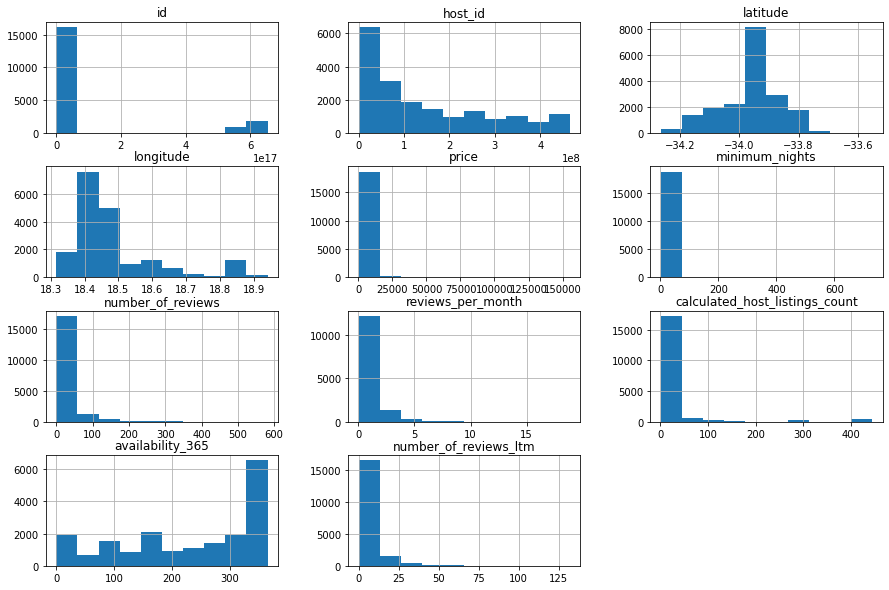

In [ ]:
# plotar o histograma das variáveis numéricas
df_cptown.hist(figsize=tuple([15,10]));

### **Q4. Qual a média dos preços de aluguel?**


Utilizando a função **describe**, rapidamente adquirimos a média de preços das acomodações. Contudo, se compararmos com a mediana, que representa a linha de 50%, repara-se um distanciamento de extrema discrepância entre elas. Sendo assim devemos tratar os prováveis outliers, fator que afeta na resultante final da média, não trazendo para realidade condizente de dados que gostaríamos de mapear.

In [ ]:
# ver a média da coluna `price``
df_cptown.price.describe()


count     18903.000000
mean       2248.552981
std        5225.645780
min         153.000000
25%         630.000000
50%        1000.000000
75%        2000.000000
max      155364.000000
Name: price, dtype: float64

Buscando agora os outliers fora das regiões de quartiles de 25% e 75%, faremos um corte nesses valores para refinar as informações 

In [ ]:
q1_price = df_cptown.price.quantile(.25)
q3_price = df_cptown.price.quantile(.75)
IQR_price = q3_price - q1_price

#limites para corte de outliers
min_price = q1_price - (1.5 * IQR_price)
max_price = q3_price + (1.5 * IQR_price)

def get_percentage(value):
  return len(df_cptown[df_cptown.price > value])/df_cptown.shape[0]*100


print("Percentual de outliers em valores máximos é de {}".format(len(df_cptown[df_cptown.price > q3_price])))
print("Isso representa {:.2f}% da quantidade de acomodações disponíveis.".format(get_percentage(q3_price)))
print("Utilizando os padrões normais 1.5*IQR, teríamos o preço corte padrão em {}. Contudo isso representa {:.2f}% do dataset.".format(max_price, get_percentage(max_price)))
print("Valor IQR do preço é de: ", IQR_price)
print("Valor mínimo de corte é: ", min_price)
# print("Valor máximo de corte é: ", max_price)

Percentual de outliers em valores máximos é de 4619
Isso representa 24.44% da quantidade de acomodações disponíveis.
Utilizando os padrões normais 1.5*IQR, teríamos o preço corte padrão em 4055.0. Contudo isso representa 11.07% do dataset.
Valor IQR do preço é de:  1370.0
Valor mínimo de corte é:  -1425.0


O corte de 10% do conteúdo de um dataset pode ser muito impactante. Considerando isso, aplicaremos uma condição que será decrementado a constante de multiplicação do IQR de maneira que chegue nos 7% de dados outliers eliminados.

In [ ]:

max_price = q3_price + (1.5 * IQR_price)
dec_IQR = 1.5
#para alterar o valor de saída para aumentar ou diminuir o percentual de corte de outliers, alterar o valor abaixo
drop_outliers_price = 0.07

while  len(df_cptown[df_cptown.price > max_price])/df_cptown.shape[0] > drop_outliers_price:  
  dec_IQR = dec_IQR + 0.05
  max_price = q3_price + (dec_IQR * IQR_price)

print("Novo máximo preço: {:.2f}".format(max_price))

  

Novo máximo preço: 5904.50


Observamos que o valor mínimo está fora da range de uma realidade, neste caso. Somado a isso, e o fato de que estamos dentro de uma plataforma de locação envolvendo valores financeiros, é improvável que algum anfitrião deixaria sua acomodação em valor "0.00" de aluguel. Sendo assim pegaremos o mínimo valor disponibilizado no dataframe para referenciar o corte mínimo.

In [ ]:
#obtendo então o valor mínimo
print('Valor mínimo de corte é: ', df_cptown.price.min())
print ('Valor máximo de corte é: {:.2f}'.format(max_price))

Valor mínimo de corte é:  153
Valor máximo de corte é: 5904.50


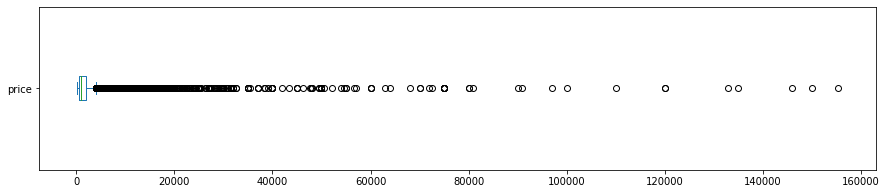

O conjunto do dataset contém 18903 linhas
O registro de elementos acima do valor de preço de corte máximo 5904.50, é de 1307 linhas
Representação percentual da amostragem de corte é 6.91%


In [ ]:
#plotando o conjunto original com outliers em um gráfico de box
plt.subplots(figsize=(15,3));
df_cptown.price.plot(kind='box', vert=False)
plt.show()
print("O conjunto do dataset contém {} linhas".format(df_cptown.shape[0]))
print("O registro de elementos acima do valor de preço de corte máximo {:.2f}, é de {} linhas".format(max_price, len(df_cptown[df_cptown.price > max_price])))
print("Representação percentual da amostragem de corte é {:.2f}%".format(len(df_cptown[df_cptown.price > max_price])/df_cptown.shape[0] * 100))

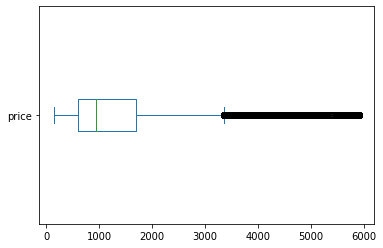

In [ ]:
#plotando agora o conjunto com os valores em corte de preço
df_clean = df_cptown.copy()
df_clean.drop(df_clean.index[df_clean.price > max_price], axis=0, inplace=True)
df_clean.price.plot(kind='box', vert=False)
plt.show()

Agora sim temos uma relação mais próxima para uma análise de dados coesa, ainda que tenhamos outliers de preço, já nos permite recalcular uma média plausível a mediana. E como pode-se observar abaixo saímos de 2248 de média para 1374. Muito mais próximo ao valor da mediana.

In [ ]:
df_clean.price.describe()

count    17596.000000
mean      1374.308934
std       1130.130720
min        153.000000
25%        600.000000
50%        950.000000
75%       1700.000000
max       5902.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
df_correlated = df_clean.drop(['id', 'host_id', 'number_of_reviews_ltm', 'calculated_host_listings_count'], axis=1).corr()
# mostrar a matriz de correlação
df_correlated

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
latitude,1.000000,-0.160822,-0.124487,0.001853,-0.026668,0.048508,0.030457
longitude,-0.160822,1.000000,-0.134864,-0.016069,-0.165338,-0.117098,0.138066
price,-0.124487,-0.134864,1.000000,0.029058,-0.083733,-0.162708,-0.095268
minimum_nights,0.001853,-0.016069,0.029058,1.000000,-0.044563,-0.078527,-0.021101
number_of_reviews,-0.026668,-0.165338,-0.083733,-0.044563,1.000000,0.553490,-0.083247
reviews_per_month,0.048508,-0.117098,-0.162708,-0.078527,0.553490,1.000000,0.071226
availability_365,0.030457,0.138066,-0.095268,-0.021101,-0.083247,0.071226,1.000000


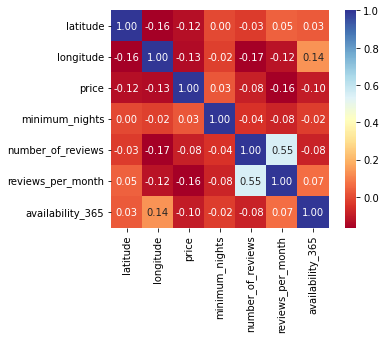

In [ ]:
# plotar um heatmap a partir das correlações
import seaborn as sns

sns.heatmap(df_correlated, annot=True, cmap="RdYlBu", fmt='.2f',square=True);


Através do mapa de calor acima, é peceptível praticamente nenhuma correlação entre a maioria das variáveis, nem mesmo relacionando latitude e longitude como referência, o que deveria enquadrar uma localização de alto ou baixo padrão de locação, Contudo, neste caso as variáveis estão sendo observadas isoladamentes e não como um conjunto latitude + longitude x price.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    12649
Private room        4666
Hotel room           199
Shared room           82
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts() / df_clean.shape[0] * 100)

Entire home/apt    71.885656
Private room       26.517390
Hotel room          1.130939
Shared room         0.466015
Name: room_type, dtype: float64


In [ ]:
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)
room_types = df_clean['room_type'].unique()
df_clean[['room_type','number_of_reviews','reviews_per_month']].copy()
jump_range = df_cptown.index.difference(df_clean.index)
reviews_sum = {}

#criado um objeto com os valores de soma dos reviews = 0
for i in room_types:
  reviews_sum[i] = 0.00

#adicionado ao objeto a soma dos reviews de cada tipo de acomodação
for i in range(df_clean.shape[0]):
  if i in jump_range:
    continue
  reviews_sum[df_clean.room_type[i]] = reviews_sum[df_clean.room_type[i]] + df_clean.reviews_per_month[i]

name_values = df_clean.room_type.value_counts().keys().tolist()
sum_values = df_clean.room_type.value_counts().tolist()

print(reviews_sum)

#tira-se então a média de reviews por mês para cada tipo de acomodação
for i in range(len(name_values)):
  reviews_sum[name_values[i]] = reviews_sum[name_values[i]] / sum_values[i]

print(reviews_sum)

# df_clean.groupby(['room_type']).reviews_per_month.mean()

{'Entire home/apt': 9551.660000000049, 'Private room': 1139.9499999999957, 'Shared room': 13.01, 'Hotel room': 31.14999999999999}
{'Entire home/apt': 0.755131630958973, 'Private room': 0.24430990141448686, 'Shared room': 0.15865853658536586, 'Hotel room': 0.15653266331658286}


Considerando que a média de reviews por mês PODE ser um indicador que contribua na frequência de locação (não sendo obrigatório um feedback do cliente que locou), conclui-se que o fato de mais de 70% das acomodações ser do tipo casa ou apartamento inteiros e o número de reviews por mês médio ser o maior considerando a avaliação acima, ratifica esse tipo de acomodação como a mais buscada para locação.

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
print(df_clean.neighbourhood.value_counts())
# neighb_list = df_clean.neighbourhood.value_counts().keys().tolist()
# price_list = df_clean.neighbourhood.value_counts().tolist()
# df_clean.groupby(['neighbourhood'],).price.mean().sort_index()

Ward 115    3426
Ward 54     1864
Ward 77     1052
Ward 23      977
Ward 64      865
            ... 
Ward 106       1
Ward 20        1
Ward 101       1
Ward 50        1
Ward 95        1
Name: neighbourhood, Length: 93, dtype: int64


In [ ]:
df_clean.groupby(['neighbourhood']).price.describe().sort_values(['mean'], ascending=False)

,count,mean,std,min,25%,50%,75%,max
neighbourhood,,,,,,,,
Ward 69,321.0,2012.557632,1461.794590,295.0,790.0,1500.0,3000.0,5882.0
Ward 74,755.0,1972.328477,1375.207560,252.0,865.5,1500.0,2700.0,5900.0
Ward 71,223.0,1958.968610,1536.141834,230.0,800.0,1350.0,2992.0,5900.0
Ward 62,364.0,1925.604396,1440.837328,234.0,850.0,1442.5,2900.0,5630.0
Ward 54,1864.0,1885.904506,1376.841754,240.0,840.0,1400.0,2615.5,5902.0
...,...,...,...,...,...,...,...,...
Ward 106,1.0,300.000000,NaN,300.0,300.0,300.0,300.0,300.0
Ward 91,2.0,300.000000,0.000000,300.0,300.0,300.0,300.0,300.0
Ward 76,1.0,220.000000,NaN,220.0,220.0,220.0,220.0,220.0


In [ ]:
df_clean.price.mean()

1374.308933848602

In [ ]:
df_filtered_price = df_clean[df_clean.price > df_clean.price.mean()]
print(df_clean.neighbourhood.value_counts().head())
df_filtered_price.neighbourhood.value_counts().head()
#  df_clean.neighbourhood.value_counts()

Ward 115    3426
Ward 54     1864
Ward 77     1052
Ward 23      977
Ward 64      865
Name: neighbourhood, dtype: int64


Ward 54     946
Ward 115    945
Ward 74     428
Ward 61     383
Ward 23     361
Name: neighbourhood, dtype: int64

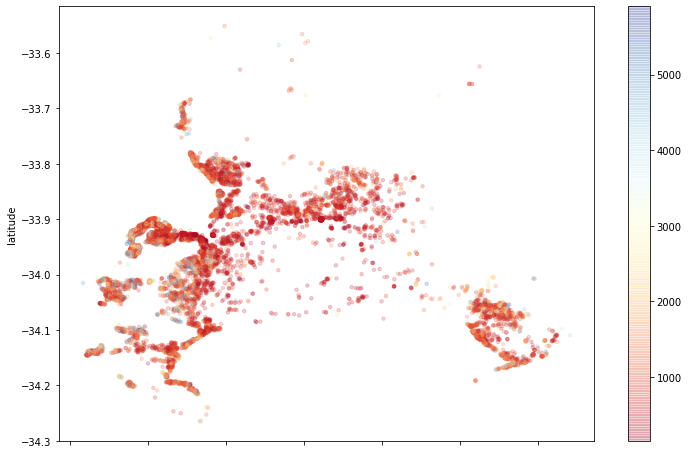

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter',x='longitude', y='latitude', c=df_clean.price, alpha=0.2,cmap="RdYlBu", s=12, figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.describe()

count    17596.000000
mean         4.014265
std         14.384418
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        730.000000
Name: minimum_nights, dtype: float64

Vamos melhorar o valor da média para um valor mínimo de noites mais próximo de uma realidade sem outliers, ainda que estes valores não estejam tão distantes dentro de uma realidade de noites para locação, comparado a mediana. Porém temos que pensar que muitas pessoas tendem a locar acomodações apenas para os finais de semana, o que seria mais próximo da mediana, no valor de 2 noites

In [ ]:
q1_nights = df_clean.minimum_nights.quantile(.25)
q3_nights = df_clean.minimum_nights.quantile(.75)
IQR_nights = q3_nights - q1_nights

#limite para corte de outliers
min_nights = q1_nights - (1.5 * IQR_nights)
max_nights = q3_nights + (1.5 * IQR_nights)

def get_percentage_nights(value):
  return len(df_clean[df_clean.minimum_nights > value])/df_clean.shape[0]*100


print("Percentual de outliers em valores máximos é de {}".format(len(df_clean[df_clean.minimum_nights > q3_nights])))
print("Isso representa {:.2f}% da quantidade de acomodações disponíveis.".format(get_percentage_nights(q3_nights)))
print("Utilizando os padrões normais 1.5*IQR, teríamos o preço corte padrão em {}. Contudo isso representa {:.2f}% do dataset.".format(max_nights, get_percentage_nights(max_nights)))
print("Valor IQR do preço é de: ", IQR_nights)
print("Valor mínimo de noites de corte é: ", min_nights)
# print("Valor máximo de corte é: ", max_nights)

Percentual de outliers em valores máximos é de 3696
Isso representa 21.00% da quantidade de acomodações disponíveis.
Utilizando os padrões normais 1.5*IQR, teríamos o preço corte padrão em 6.0. Contudo isso representa 10.25% do dataset.
Valor IQR do preço é de:  2.0
Valor mínimo de corte é:  -2.0


Seguindo o mesmo raciocínio do corte de preços, o corte de 10% do conteúdo de um dataset pode ser muito impactante, ainda mais já tendo dados limpos de uma primeira análise de preço. Poderíamos utilizar o dataset original para avaliação, mas a idéia é pegar mais um subconjunto de valores já com a aplicação de um valor mais aproximado da realidade dos atributos de preço.Considerando isso, aplicaremos uma condição que será decrementado a constante de multiplicação do IQR de maneira que chegue nos 5% de dados outliers eliminados.

In [ ]:
max_nights = q3_nights + (1.5 * IQR_nights)
dec_IQR = 1.5

#para alterar o valor de saída para aumentar ou diminuir o percentual de corte de outliers, alterar o valor abaixo
drop_outliers_nights = 0.05

while  len(df_clean[df_clean.minimum_nights > max_nights])/df_clean.shape[0] > drop_outliers_nights:  
  dec_IQR = dec_IQR + 0.05
  max_nights = q3_nights + (dec_IQR * IQR_nights)

print("Novo máximo mínimo de noites é: {:.2f}".format(max_nights))


Novo máximo mínimo de noites é: 10.10


Observamos que o valor mínimo está fora da range de uma realidade, neste caso. Somado a isso, e o fato de que estamos dentro de uma plataforma de locação envolvendo valores mínimos de dias para locação, é impossível uma quantidade de dias negativo ou "0.00". Sendo assim pegaremos o mínimo valor disponibilizado no dataframe para referenciar o corte mínimo.

In [ ]:
#obtendo então o valor mínimo
print('Valor mínimo de corte é: ', df_clean.minimum_nights.min())
print ('Valor máximo de corte é: {:.2f}'.format(max_nights))

Valor mínimo de corte é:  1
Valor máximo de corte é: 10.10


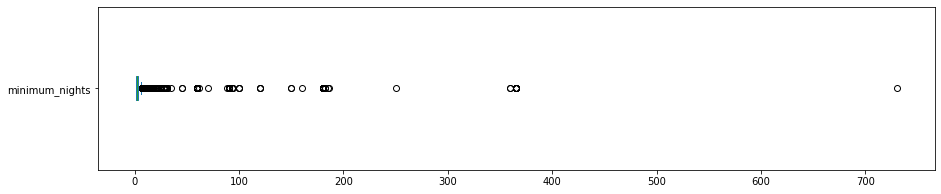

O conjunto do dataset contém 17596 linhas
O registro de elementos acima do valor de preço de corte máximo 10.10, é de 678 linhas
Representação percentual da amostragem de corte é 3.85%


In [ ]:
#plotando o conjunto original com outliers em um gráfico de box
plt.subplots(figsize=(15,3));
df_clean.minimum_nights.plot(kind='box', vert=False)
plt.show()
print("O conjunto do dataset contém {} linhas".format(df_clean.shape[0]))
print("O registro de elementos acima do valor de preço de corte máximo {:.2f}, é de {} linhas".format(max_nights, len(df_clean[df_clean.minimum_nights > max_nights])))
print("Representação percentual da amostragem de corte é {:.2f}%".format(len(df_clean[df_clean.minimum_nights > max_nights])/df_clean.shape[0] * 100))

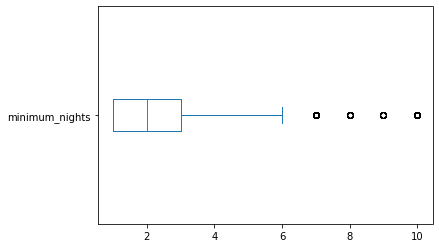

2.49 é a média de mínimo de noites. Com arredondamento temos: 3 diárias como valor médio.


In [ ]:
#plotando agora o conjunto com os valores em corte de mínimo de noites
df_min_nights = df_clean.copy()
df_min_nights.drop(df_min_nights.index[df_min_nights.minimum_nights > max_nights], axis=0, inplace=True)
df_min_nights.minimum_nights.plot(kind='box', vert=False)
plt.show()
print('{:.2f} é a média de mínimo de noites. Com arredondamento temos: {} diárias como valor médio.'.format(df_min_nights.minimum_nights.mean(),math.ceil(df_min_nights.minimum_nights.mean())))

## Conclusões


Considerando que este dataset tem dados resumidos, e basicamente para filtrar os outliers utilizamos primeiramente o atributo de preço de diária e posteriormente fizemos outra limpeza de dados em relação ao número mínimo de noites, a conclusão desta análise não traduz a realidade mais próxima para qualquer tomada de decisão ou uma análise mais profunda às regiões de Cape Town na África do Sul. Sendo assim, verificamos sim que existem outliers em ambas as variáveis, e uma limpeza dos dados nos permitiu trazer um plot de gráficos mais confiável. 

O número percentual para cortes de outliers não foi baseado em nenhum tipo de estudo estatístico para avaliar se é a melhor opção para o dataset em questão.

Em relação ao tipo de acomodação (**room_type**) com maior frequência de locação, trouxemos o atributo de número de reviews por mês para cruzamento de dados à quantidade de tipo de acomodação, com a intenção de um filtro de melhor precisão de qual região tende a ter mais busca pelos usuários do Airbnb, considerando que, provavelmente, quanto mais reviews, mais vezes a acomodação PODE ter sido alugada. Porém, esta condição não é necessariamente uma regra, considerando que não existe obrigação por parte do cliente final em avaliar a acomodação que acabou optando para locação.